#### Kullanılacak paketler

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

####    Verimiz

Veri setimiz elmasların kesimleri, renkleri, berraklıkları, fiyatları ve diğer özellikleri hakkında bilgileri içermektedir.

In [5]:
data1 = pd.read_csv("C:/Users/Ipek/Downloads/diamonds.csv")
data1 = data1
data = data1.copy()
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


carat: Karat bir ağırlık ölçüsüdür.

cut kesimin kesim kalitesini ifade eder. (Orta, İyi, Çok İyi, Premium, İdeal )

color elmas rengini temsil ediyor, J'den (en kötü) D'ye (en iyi)

clarity-berraklık pırlantanın ne kadar berrak olduğunun ölçümüdür (I1 (en kötü), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (en iyi) )

depth: Derinlik sütun muhtemelen ya derinlik yüzdesini ya da bir öğenin gerçek derinlik ölçümünü temsil eder. 

table: Değerli taşın genişliğine göre üst fasetinin boyutunu temsil eder.

Price: Fiyat, ürünün boyut özelliklerinden etkilenmiş gibi görünen bağımlı değişkendir.

X (Uzunluk): Değerli taşın uzunluğu 

Y (Genişlik): Ürünün genişliği 

Z (Derinlik): Ürünün gerçek derinlik ölçümü (yukarıdan aşağıya)

In [6]:
data.shape

(53940, 11)

Verimizde 11 sütun olup 53940 adet değer vardır.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Buradaki cut,color,clarity değişkenlerine daha sonra dummy değişken olarak atama gerçekleştirilecektir.
Verinin betimsel istatistiklerine bakalım:

In [8]:
data = data.drop(["Unnamed: 0"], axis=1)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


500 gözlemden oluşan bir örneklem seçilir. hue="cut" parametresi, cut adlı kategorik özelliği renklendirmek için kullanılır. Yani, grafiğin farklı renklerle kategorik bir değişken olan "cut" özelliğine göre ayrılmasını sağlar. Bu, veri setindeki her kategori için farklı renklerde noktaların gösterilmesini sağlar. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

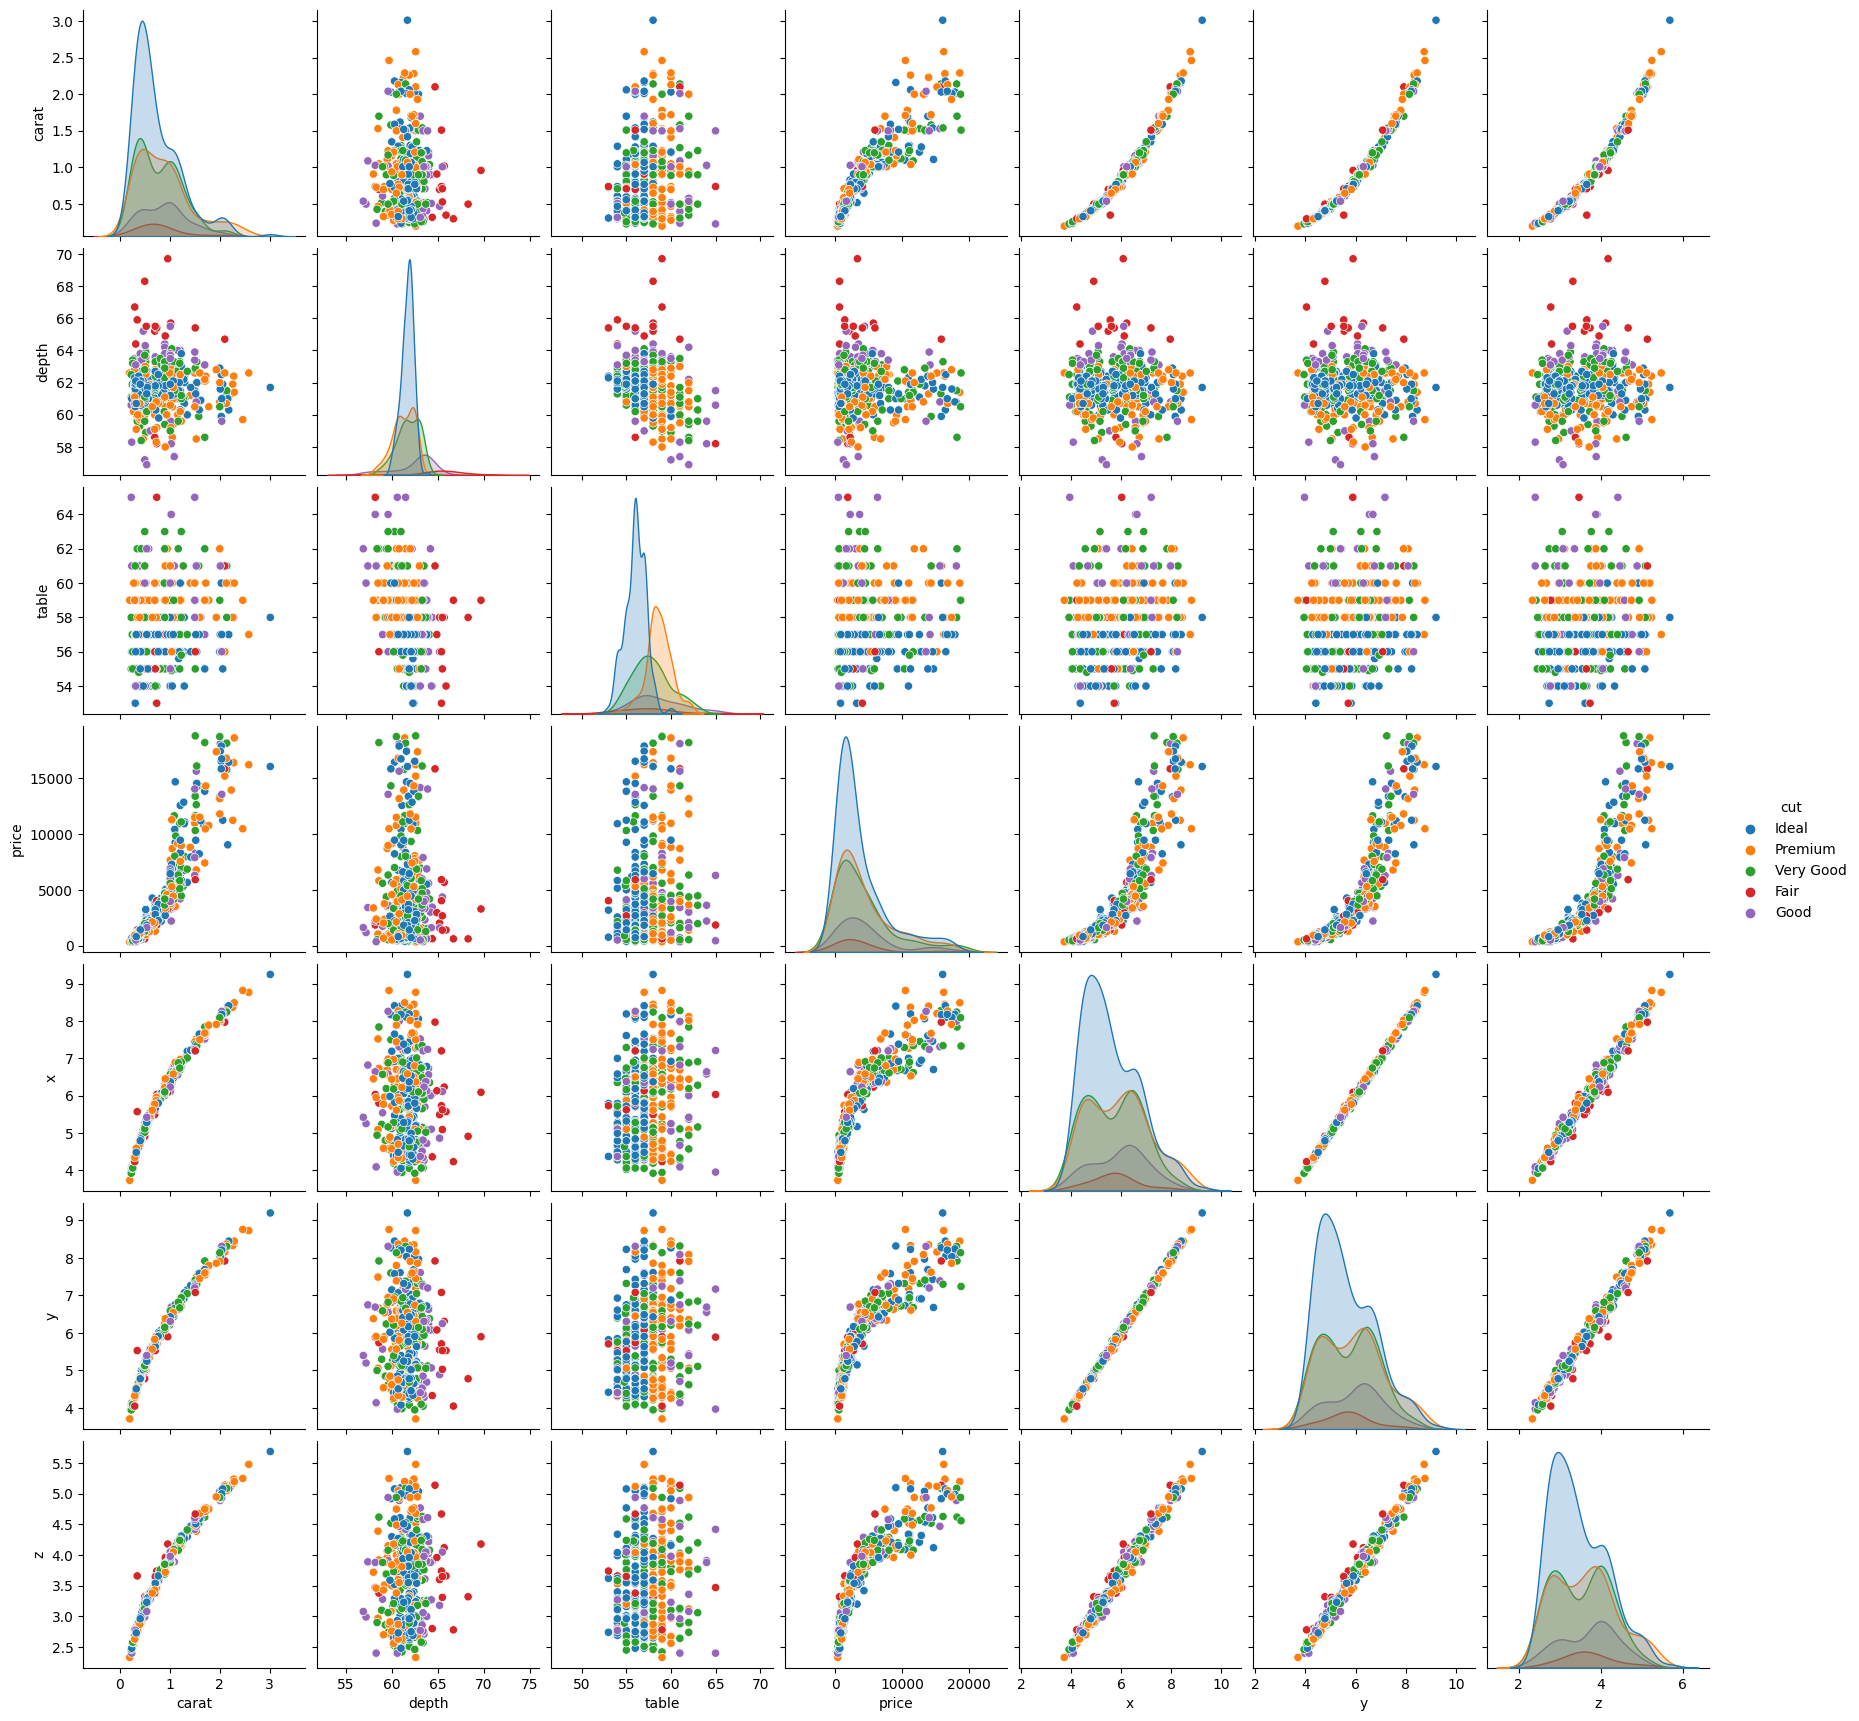

In [9]:
sampled_data = data.sample(n=500, random_state=2020)

plt.figure(figsize=(10, 10))
sns.pairplot(sampled_data, hue="cut")
plt.show()

Değişkenler arasındaki korelasyonları da ele alabiliriz:

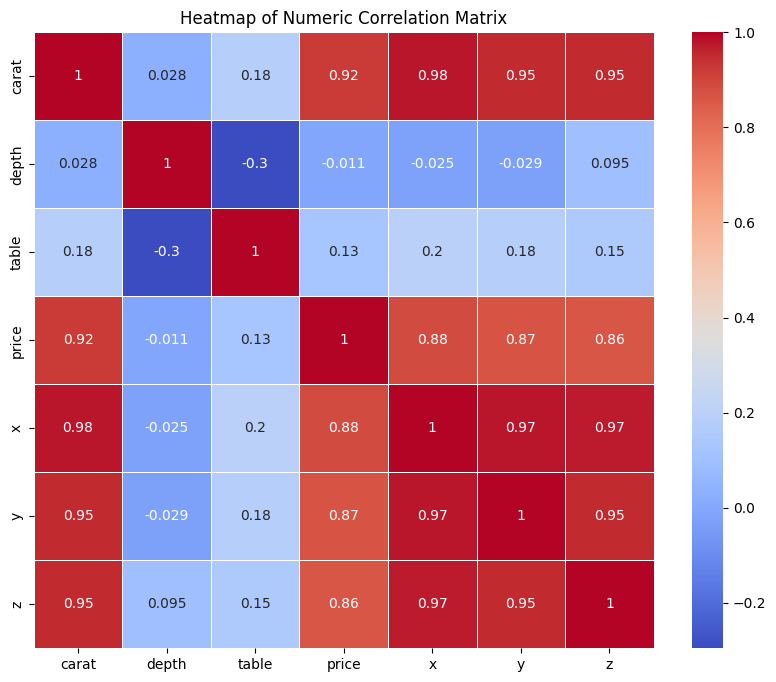

In [10]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix_numeric = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_numeric,annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Numeric Correlation Matrix')
plt.show()

Karat', 'price' (0,92) ve 'x', 'y' ve 'z' boyutları (sırasıyla 0,98, 0,95 ve 0,95) ile yüksek oranda pozitif korelasyon göstermektedir; bu da daha büyük elmasların genellikle daha ağır ve daha pahalı olması nedeniyle beklenen bir durumdur.'Fiyat' da 'x', 'y' ve 'z' ile güçlü pozitif korelasyonlar göstermektedir (sırasıyla 0,88, 0,87 ve 0,86), bu da elmasın boyutu arttıkça fiyatının da arttığını göstermektedir.'Derinlik' ile 'carat', 'price' ve diğer değişkenler arasında çok düşük bir korelasyon vardır ya da hiç yoktur; bu da bir elmasın derinlik yüzdesinin karatını, fiyatını veya boyutunu önemli ölçüde etkilemediğini gösterir.'Table', 'depth' ile küçük bir negatif korelasyona sahiptir (-0,3), bu da masa boyutu arttıkça derinlik yüzdesinin biraz azaldığını gösterebilir.'x', 'y' ve 'z' arasında çok yüksek korelasyonlar vardır (hepsi 0,95'in üzerindedir), bu da tipik olarak elmasın bir boyutunun artması halinde diğerlerinin de arttığını gösterir ki bu da elmasın fiziksel oranlarıyla tutarlıdır.

### Outlier'ların verimizden çıkarılması

In [11]:
z_scores = np.abs(stats.zscore(numeric_data))
data_cleaned = data[(z_scores < 3).all(axis=1)]
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape

((53940, 10), (51590, 10))

Outlier değerlerimiz veriden çıkartık bu işlemin sonucunda 200 e yakın değeri çıkarmış olduk bu sayede daha doğru sonuçlar elde edebileceğiz.Outlier değerlerini veriden çıkartıktan sonra betimsel istatistikleri tekrar inceledik:

In [12]:
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,51590.0,0.759933,0.424983,0.20,0.39,0.70,1.02,2.21
depth,51590.0,61.752838,1.269255,57.50,61.10,61.80,62.50,66.00
table,51590.0,57.369137,2.100018,51.00,56.00,57.00,59.00,64.00
price,51590.0,3586.031847,3436.874161,326.00,926.00,2303.50,5047.00,15898.00
x,51590.0,5.657855,1.057420,3.73,4.69,5.66,6.49,8.60
y,51590.0,5.661272,1.050383,3.68,4.70,5.66,6.49,8.55
z,51590.0,3.494649,0.653051,1.53,2.89,3.49,4.01,5.30


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

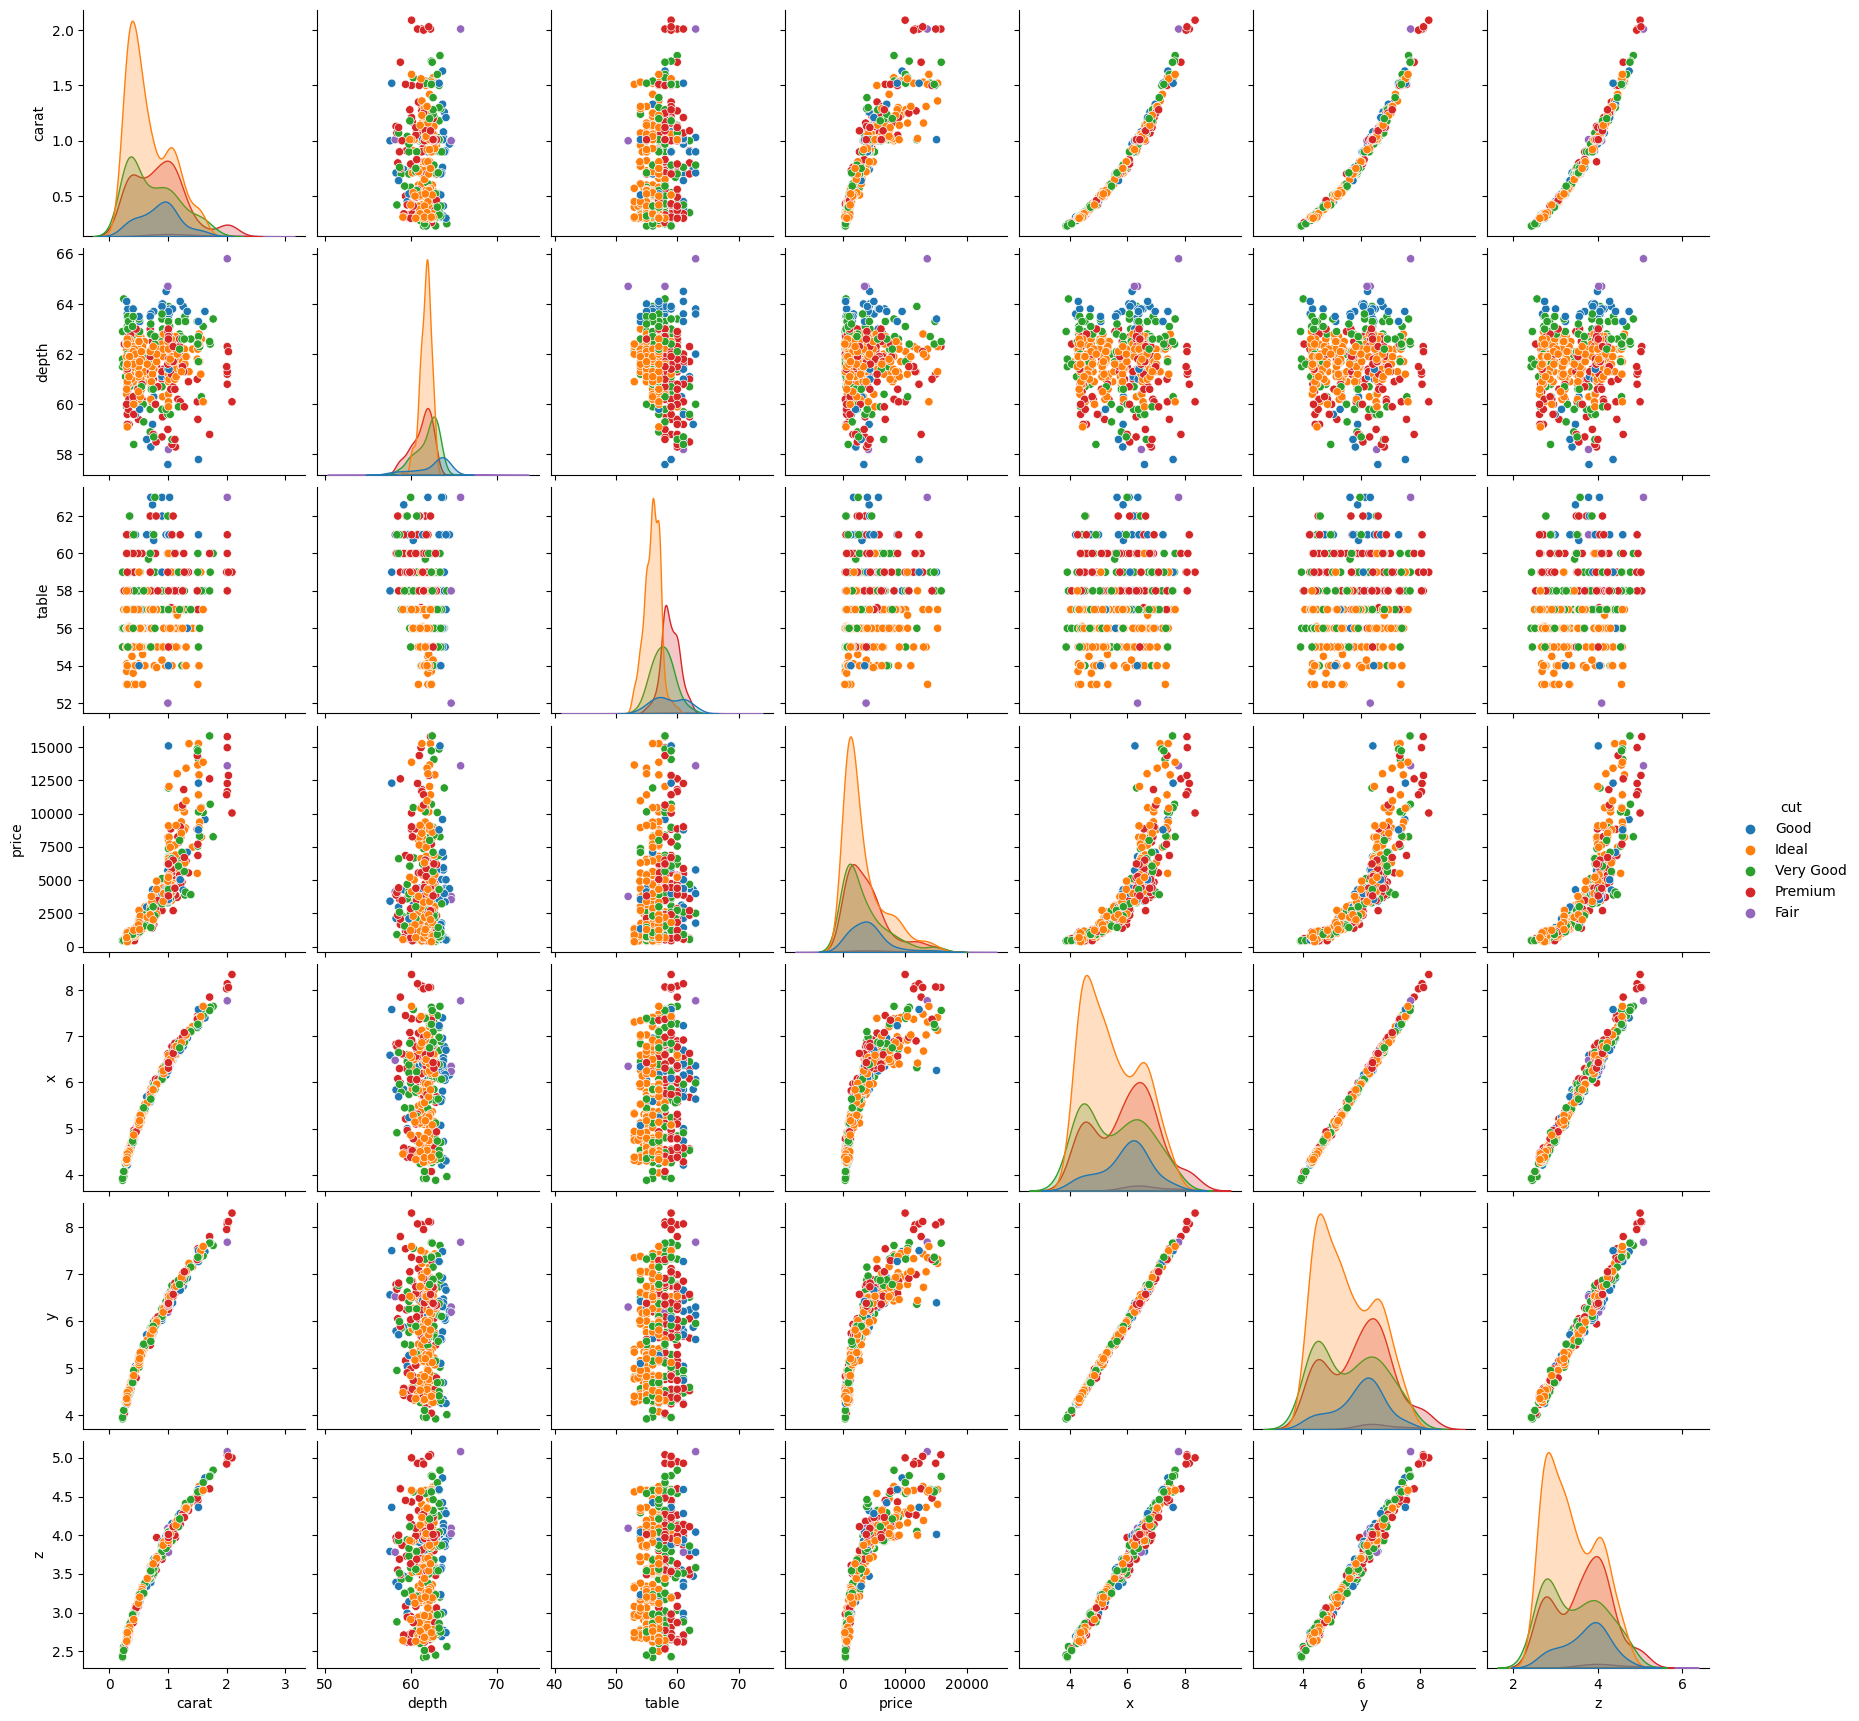

In [13]:
sampled_data1 = data_cleaned.sample(n=500, random_state=2020)
plt.figure(figsize=(10, 10))
sns.pairplot(sampled_data1, hue= "cut")
plt.show()

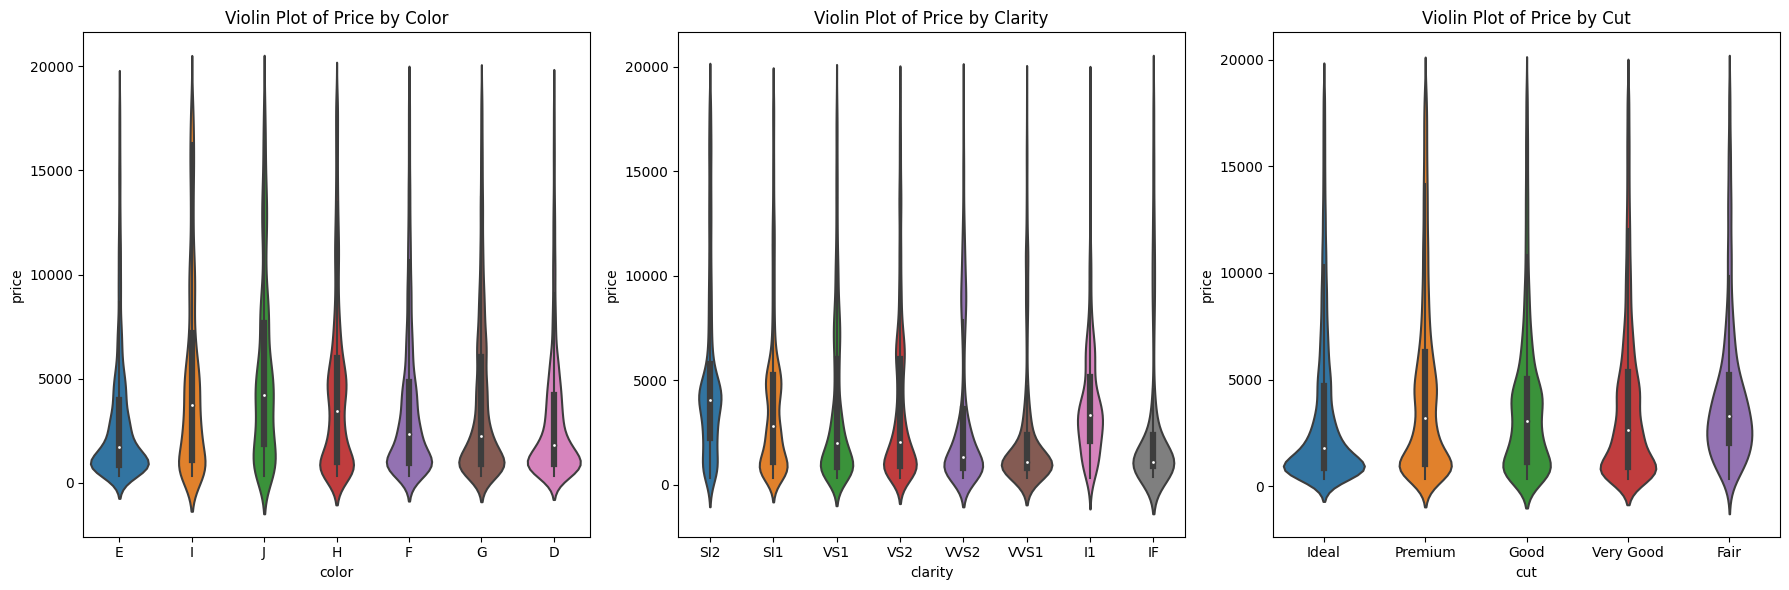

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.violinplot(x="color", y="price", data=data)
plt.title("Violin Plot of Price by Color")
plt.subplot(1, 3, 2)
sns.violinplot(x="clarity", y="price", data=data)
plt.title("Violin Plot of Price by Clarity")
plt.subplot(1, 3, 3)
sns.violinplot(x="cut", y="price", data=data)
plt.title("Violin Plot of Price by Cut")

plt.tight_layout()
plt.show()

E, I ve J renkleri için dağılımlar, fiyat spektrumunun alt ucunda daha geniş bir aralığa sahip görünmektedir, bu da bu renk kategorilerinde daha düşük fiyatlı ürünlerin daha yüksek bir sıklığa işarettir. F, G ve D renkleri, Violinlerin en geniş kısımlarının orta fiyat aralığında yer aldığı daha düzgün bir fiyat dağılımı göstermektedir.Genellikle elmaslarda en yüksek kalite ile ilişkilendirilen D renk kategorisi, fiyat ekseninde daha yukarılara uzanan bir dağılıma sahiptir ve bu da D renkli ürünlerin daha pahalı olabileceğini göstermektedir.

SI2 ve I1 berraklık kategorileri alt uçta daha geniş bölümlere sahiptir, bu da daha düşük fiyatlı ürünlerin daha fazla yoğunlaştığını gösterir.
VS1 ve VS2 kategorileri daha orta aralıkta bir fiyat yoğunlaşması göstermekte olup, bu da bu berraklık derecelerine sahip ürünlerin fiyat aralığının ortasında daha yaygın olarak bulunduğunu düşündürmektedir. IF (İçten Kusursuz) kategorisi daha küçük bir dağılıma sahiptir ve daha yüksek kalite ve nadirliklerinin bir göstergesi olarak daha yüksek fiyatlara doğru eğimlidir.

'İdeal' kesim kategorisi fiyat aralığında geniş bir dağılıma sahiptir, ancak özellikle orta ve üst fiyat aralığında geniş bir dağılıma sahiptir, bu da çok sayıda ürünün bu aralıkta fiyatlandırıldığını göstermektedir. 'Premium' ve 'Çok İyi' kesimler, geniş bir fiyat aralığına sahip olmakla birlikte orta fiyat bölgesinde yoğunlaşarak benzer bir model göstermektedir.'İyi' ve 'Orta' kesimlerin fiyat aralığının alt ucunda daha geniş bir tabana sahip olması, bu kesimlerin daha düşük fiyatlarda daha yaygın olarak bulunduğunu göstermektedir.

### Veriyi train test olarak ayırıp düzenleme

Veri setimizde 51590 gözlem olduğu için cross validation yaparken işlemler çok uzun sürüyor. bu yüzden iloc ile ilk 2500 gözlemi seçerek bunun üzerinden işlem gerçekleştirecğiz.

In [64]:
new_data = pd.get_dummies(data_cleaned.iloc[:2500], columns=['cut', 'color', 'clarity']) #ilk 2500 gözlemi seçtik ve dummyleri atadık
X = new_data.drop('price', axis=1)
y = new_data['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2020)

Bağımlı değişkenimizi Y değeri olarak ayırdık geri kalan bağımsız değişkenleride X olarak tanımladık. Verimizi train ve test olarak %80 train(eğitim) %20 test olarak ayırdık.

### 1-SUPPORT VECTOR REGRESSİON

In [12]:
from sklearn.svm import SVR

In [13]:
svr=SVR(kernel="linear").fit(X_train,y_train)

In [14]:
dir(svr)

['C',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_num_iter',
 '_parameter_constraints',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_vali

In [19]:
svr.coef_

array([[ 140.12995637,    3.79789002,    8.98179076,  207.36380083,
         231.23608336,  215.52545443,  -21.99709234,   -5.53968528,
          31.48452914,  -26.37631497,    3.64364291,   74.69773912,
          55.06788686,   18.81494295,  -15.05153959,  -45.56323508,
         -72.51862181,  -72.9126587 , -118.12327767,   52.00308877,
         -37.26610716,  -97.53892478,   53.36118001,   20.3776206 ,
          80.97097617,   70.87014465]])

coef_ özelliği, modelin öğrenmiş olduğu doğrusal katsayıları temsil eder. Her bir özellik için bir katsayıya sahip olduğu durumlarda, bu katsayılar özelliklerin önemini ve katkılarını belirtir. Örneğin, bir özellik için pozitif bir katsayı, o özelliğin artan değerlerinin hedef değişken üzerinde pozitif bir etkiye sahip olduğunu gösterebilir.Negatif katsayı için de azalan bir etkiye sahip olduğunu söyleyebiliriz.

In [16]:
svr.n_features_in_  #Bu özellik, modelin eğitildiği veri setindeki özellik sayısına erişmek için kullanılır.

26

In [20]:
svr.intercept_ 

array([2689.82659074])

Lineer regresyonda olduğu gibi, bir doğrusal fonksiyonun sabit terimi olarak düşünülebilir. SVR, bazen doğrusal olmayan bir model olduğundan, bu intercept_ değeri yalnızca modelin doğrusal kısmını temsil eder. Bu sabit terim, modelin hedef değişkeni tahmin ederken doğrusal olmayan bileşenler dışındaki sabit katkıyı belirtir.

In [18]:
svr.kernel 

'linear'

### TAHMİN & PERFORMANS

In [21]:
y_pred_svr_train = svr.predict(X_train)
y_pred_svr_test = svr.predict(X_test)

In [22]:
RMSE_svr_train = np.sqrt(mean_squared_error(y_train, y_pred_svr_train))
RMSE_svr_test = np.sqrt(mean_squared_error(y_test, y_pred_svr_test))
print(r2_score(y_train,y_pred_svr_train) ,r2_score(y_test,y_pred_svr_test))
print(mean_absolute_percentage_error(y_test, y_pred_svr_test) , mean_absolute_percentage_error(y_train , y_pred_svr_train))

0.9401342419228766 0.9383516893127796
0.08926117315743239 0.09851079936938881


Bu değerleri tablolaştırırsak:

In [23]:
import pandas as pd


data = {
    'R2 Score ': [r2_score(y_train, y_pred_svr_train), r2_score(y_test, y_pred_svr_test)],
    'MAPE ': [mean_absolute_percentage_error(y_test, y_pred_svr_test), mean_absolute_percentage_error(y_train, y_pred_svr_train)],
    'RMSE ': [RMSE_svr_train, RMSE_svr_test]
}


df = pd.DataFrame(data, index=['Train', 'Test'])
print(df)


       R2 Score      MAPE        RMSE 
Train   0.940134  0.089261  198.080304
Test    0.938352  0.098511  195.171788


eğitim kümesi ve test kümesinin R2 açıklanma oranı birbirine çok yakın çıktı. eğitim kümesindeki yüksek R2 değerleri overfittingin işaretçisi olabilir. model iyi bir ezber yapmış olabilir.MAPE, gerçek değerlerle modelin tahmin ettiği değerler arasındaki yüzde hata ortalamasını ifade eder.MAPE'nin düşük olması, modelin daha iyi tahminler yaptığını gösterirken, yüksek MAPE değeri, modelin tahminlerinin gerçek değerlerden daha fazla sapma gösterdiğini belirtir.
RMSE, gerçek değerlerle modelin tahmin ettiği değerler arasındaki farkların karelerinin ortalamasının kareköküdür. Bu değer ne kadar küçükse, modelin tahminlerinin gerçek değerlere o kadar yakın olduğu düşünülür. Yüksek RMSE değeri, modelin tahminlerinin gerçek değerlere göre daha fazla sapma gösterdiğini ifade eder. 

### MODEL TUNİNG(AYARLAMA)

In [25]:
model = SVR(kernel="linear")
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

In [26]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.01, 0.001]})

In [27]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

 en iyi performansı gösteren hiperparametrelerle eğitilmiş olan ve bu hiperparametrelerle oluşturulan modeli oluşturduk.

### CV İÇİN TAHMİN & PERFORMANS 

In [28]:
test_predictionsSVC = best_estimator.predict(X_test)
train_predictionsSVC = best_estimator.predict(X_train)

In [29]:
msetest = mean_squared_error(y_test, test_predictionsSVC)
msetrain= mean_squared_error(y_train, train_predictionsSVC)
print(f'Test set için MSE: {msetest}, Train set için MSE: {msetrain}')
print(f'train için R2 score değeri: {r2_score(y_train,train_predictionsSVC)} ,test için R2 score değeri{r2_score(y_test,test_predictionsSVC)}')
print(mean_absolute_percentage_error(y_test, test_predictionsSVC) , mean_absolute_percentage_error(y_train , train_predictionsSVC))

Test set için MSE: 33269.23767821758, Train set için MSE: 33496.80084491137
train için R2 score değeri: 0.9488907827966577 ,test için R2 score değeri0.946156913174496
0.08378667752622414 0.08639672393259498


In [30]:
import pandas as pd

data = {
    'MSE (Test)': [msetest],
    'MSE (Train)': [msetrain],
    'R2 Score (Train)': [r2_score(y_train, train_predictionsSVC)],
    'R2 Score (Test)': [r2_score(y_test, test_predictionsSVC)],
    'MAPE (Test)': [mean_absolute_percentage_error(y_test, test_predictionsSVC)],
    'MAPE (Train)': [mean_absolute_percentage_error(y_train, train_predictionsSVC)]
}

df = pd.DataFrame(data)
print(df)


     MSE (Test)   MSE (Train)  R2 Score (Train)  R2 Score (Test)  MAPE (Test)  \
0  33269.237678  33496.800845          0.948891         0.946157     0.083787   

   MAPE (Train)  
0      0.086397  


en iyi parametreleri kullanarak oluşturulan model ve cross validationa göre test kümesinin R2 değeri biraz daha artarak train set değerine hemen hemen benzedi.

### 2-DECİSİON TREE REGRESSİON 

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
decTr = DecisionTreeRegressor(random_state=2020).fit(X_train,y_train)

In [33]:
dir(decTr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features

In [34]:
decTr.max_features_ # her düğümde dikkate alınacak maksimum özellik sayısını belirtir

26

In [35]:
decTr.n_features_in_

26

In [39]:
decTr.feature_importances_ #her bir özelliğin model tarafından ne kadar önemli olduğunu belirten bir dizi veya özellik ağırlıklarını içerir.

array([2.98150240e-03, 3.43250590e-03, 1.94831387e-03, 9.78043379e-01,
       3.51152655e-03, 2.20845542e-03, 1.31073185e-04, 2.00923321e-04,
       4.59023998e-04, 6.44289750e-04, 2.66580379e-04, 7.10016012e-04,
       3.94081857e-04, 4.31660993e-04, 7.43187035e-04, 4.63077390e-04,
       4.23141932e-04, 2.96191351e-04, 1.19777488e-04, 9.34851951e-05,
       5.88912427e-04, 3.82316253e-04, 6.43386225e-04, 4.27844454e-04,
       2.59516360e-04, 1.95831718e-04])

### TAHMİN & PERFORMANS

In [40]:
y_pred_decTr_train = decTr.predict(X_train)
y_pred_decTr_test = decTr.predict(X_test)

In [42]:
RMSE_decTr_train = np.sqrt(mean_squared_error(y_train, y_pred_decTr_train))
RMSE_decTr_svr_test = np.sqrt(mean_squared_error(y_test, y_pred_decTr_test))
print(f'train için rmse:{RMSE_decTr_train}')
print(f'test için rmse: {RMSE_decTr_svr_test}')
print(f'test için mape: {mean_absolute_percentage_error(y_test, y_pred_decTr_test)}
      ,train için mape: {mean_absolute_percentage_error(y_train , y_pred_decTr_train)}')
print(f'train için R2 score değeri: {r2_score(y_train,y_pred_decTr_train)} ,
      test için R2 score değeri{r2_score(y_test,y_pred_decTr_test)}')

train için rmse:0.8854377448471462
test için rmse: 154.06849126281466
test için mape: 0.04135994787327199,train için mape: 8.850250626566416e-06
train için R2 score değeri: 0.9999988037775167 ,test için R2 score değeri0.9615837685056887


In [43]:
import pandas as pd

data = {
    'RMSE (Train)': [RMSE_decTr_train],
    'RMSE (Test)': [RMSE_decTr_svr_test],
    'MAPE (Test)': [mean_absolute_percentage_error(y_test, y_pred_decTr_test)],
    'MAPE (Train)': [mean_absolute_percentage_error(y_train, y_pred_decTr_train)],
    'R2 Score (Train)': [r2_score(y_train, y_pred_decTr_train)],
    'R2 Score (Test)': [r2_score(y_test, y_pred_decTr_test)]
}

df = pd.DataFrame(data)
print(df)


   RMSE (Train)  RMSE (Test)  MAPE (Test)  MAPE (Train)  R2 Score (Train)  \
0      0.885438   154.068491      0.04136      0.000009          0.999999   

   R2 Score (Test)  
0         0.961584  


Decision tree regresyona göre train setin R2 değeri 1 çıktı. bu overfitting olduğunu söyler.

### MODEL TUNİNG(AYARLAMA)

In [45]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decPar = DecisionTreeRegressor(random_state=2020)

decTreCV = GridSearchCV(decPar,param_grid ,cv=5 ,n_jobs=-1).fit(X_train,y_train)

In [46]:
best_params = decTreCV.best_params_
best_model = decTreCV.best_estimator_

### CV İÇİN TAHMİN & PERFORMANS 

In [47]:
y_pred_CV_test_DTR = best_model.predict(X_test)
y_pred_CV_train_DTR = best_model.predict(X_train)

In [48]:
RMSE_dTRCV_train = np.sqrt(mean_squared_error(y_train, y_pred_decTr_train))
RMSE_dTRCV_svr_test = np.sqrt(mean_squared_error(y_test, y_pred_decTr_test))
print(f'train için rmse:{RMSE_dTRCV_train}, test için rmse: {RMSE_dTRCV_svr_test}')
print(mean_absolute_percentage_error(y_train, y_pred_decTr_train) ,
      mean_absolute_percentage_error(y_test , y_pred_decTr_test))
print(f'train için R2 score değeri: {r2_score(y_train,y_pred_decTr_train)} 
      ,test için R2 score değeri{r2_score(y_test,y_pred_decTr_test)}')

train için rmse:0.8854377448471462, test için rmse: 154.06849126281466
8.850250626566416e-06 0.04135994787327199
train için R2 score değeri: 0.9999988037775167 ,test için R2 score değeri0.9615837685056887


In [49]:
import pandas as pd

data = {
    'RMSE (Train)': [RMSE_dTRCV_train],
    'RMSE (Test)': [RMSE_dTRCV_svr_test],
    'MAPE (Train)': [mean_absolute_percentage_error(y_train, y_pred_decTr_train)],
    'MAPE (Test)': [mean_absolute_percentage_error(y_test, y_pred_decTr_test)],
    'R2 Score (Train)': [r2_score(y_train, y_pred_decTr_train)],
    'R2 Score (Test)': [r2_score(y_test, y_pred_decTr_test)]
}

df = pd.DataFrame(data)
print(df)


   RMSE (Train)  RMSE (Test)  MAPE (Train)  MAPE (Test)  R2 Score (Train)  \
0      0.885438   154.068491      0.000009      0.04136          0.999999   

   R2 Score (Test)  
0         0.961584  


Sonuçlar genel olarak modelin eğitim ve test veri setlerinde iyi performans gösterdiğini, ancak eğitim ve test setleri arasında bazı farklılıklar olduğunu gösteriyor. Örneğin, R2 skoru eğitim setinde çok yüksekken, test setinde biraz daha düşük. Bu durum, modelin eğitim setine aşırı uyum sağlamış olabileceğini gösterebilir.

### 3-KNN REGRESSİON

In [50]:
from sklearn.neighbors import KNeighborsRegressor


In [51]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [53]:
dir(knn_regressor)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate_params',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_features_in_',


In [54]:
knn_regressor.metric

'minkowski'

metric parametresi, KNN algoritmasında kullanılan mesafe ölçüsünü belirtir. KNN, bir örnek için tahmin yaparken komşularının mesafesini dikkate alır ve bu mesafeyi ölçmek için farklı metrikler kullanılabilir.

Bu parametre, KNN algoritmasında kullanılacak mesafe ölçüsünü belirler. Örneğin, metric='euclidean' olarak belirtilirse, KNN algoritması Avrupa mesafesi (Öklid mesafesi) kullanarak komşuluk ilişkilerini belirleyecektir. Farklı mesafe ölçümleri arasında Öklid mesafesi, Manhattan mesafesi, Chebyshev mesafesi, Minkowski mesafesi gibi metrikler bulunabilir.

In [55]:
knn_regressor.n_neighbors

5

 Bu parametre, KNN algoritmasında her bir örneğin tahmin edilmesi için kullanılacak komşu sayısını belirtir. Yani bu modelde her bir tahmin için kullanılacak komşu sayısı 5 olacaktır. 

### TAHMİN & PERFORMANS

In [56]:
y_pred_test_knn = knn_regressor.predict(X_test)
y_pred_train_knn = knn_regressor.predict(X_train)

RMSE_KNN_train = np.sqrt(mean_squared_error(y_train, y_pred_train_knn))
RMSE_KNN_test = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))
MAPE_KNN_train = mean_absolute_percentage_error(y_train, y_pred_train_knn)
MAPE_KNN_test = mean_absolute_percentage_error(y_test, y_pred_test_knn)
R2_KNN_train = r2_score(y_train, y_pred_train_knn)
R2_KNN_test = r2_score(y_test, y_pred_test_knn)


print("RMSE (Train):", RMSE_KNN_train)
print("RMSE (Test):", RMSE_KNN_test)
print("MAPE (Train):", MAPE_KNN_train)
print("MAPE (Test):", MAPE_KNN_test)
print("R² Score (Train):", R2_KNN_train)
print("R² Score (Test):", R2_KNN_test)

RMSE (Train): 111.22541984636426
RMSE (Test): 134.44424152785422
MAPE (Train): 0.03691487667915865
MAPE (Test): 0.04643608899427687
R² Score (Train): 0.9811242591721352
R² Score (Test): 0.970746925906881


Genel olarak, yüksek R² skorları ve düşük RMSE ve MAPE değerleri, modelin hem eğitim hem de test veri setleri üzerinde iyi performans gösterdiğini gösteriyor. Ancak, eğitim ve test setleri arasındaki performans farklılıkları göz önüne alındığında, modelin bir miktar aşırı uyuma (overfitting) sahip olabileceği veya belirli bir genelleme kapasitesine sahip olduğu düşünülebilir. Bu durumda, modelin daha iyi genelleme yeteneği kazanması için farklı hiperparametre ayarları veya model optimizasyonu düşünülebilir.

### MODEL TUNİNG(AYARLAMA)

In [57]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}


knn_regressor = KNeighborsRegressor()

grid_search = GridSearchCV(estimator=knn_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

### CV İÇİN TAHMİN & PERFORMANS 

In [58]:
best_knn_regressor = grid_search.best_estimator_


y_pred_train_knn = best_knn_regressor.predict(X_train)
y_pred_test_knn = best_knn_regressor.predict(X_test)

RMSE_KNN_train = np.sqrt(mean_squared_error(y_train, y_pred_train_knn))
RMSE_KNN_test = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_KNN_train = mean_absolute_percentage_error(y_train, y_pred_train_knn)
MAPE_KNN_test = mean_absolute_percentage_error(y_test, y_pred_test_knn)


R2_KNN_train = r2_score(y_train, y_pred_train_knn)
R2_KNN_test = r2_score(y_test, y_pred_test_knn)


print("RMSE (Train):", RMSE_KNN_train)
print("RMSE (Test):", RMSE_KNN_test)
print("MAPE (Train):", MAPE_KNN_train)
print("MAPE (Test):", MAPE_KNN_test)
print("R² Score (Train):", R2_KNN_train)
print("R² Score (Test):", R2_KNN_test)

RMSE (Train): 0.8854377448471462
RMSE (Test): 128.2418798019446
MAPE (Train): 0.0008850250626566416
MAPE (Test): 4.339358224754082
R² Score (Train): 0.9999988037775167
R² Score (Test): 0.9733837509781839


Test kümesinin MAPE değerinin yüksek olması en iyi parametrelerle çalıştırılan en iyi modelin gerçek değerlerle tahminleri arasında yüzde olarak daha büyük hatalar yapıldığını gösteriyor.Düşük bir RMSE, modelin test veri setinde ne kadar iyi performans gösterdiğini gösterebilir.

### 4-GRADİENT BOOSTİNG REGRESSİON

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=2020)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=2020)

In [60]:
dir(gbr)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_initialized',
 '_check_n_features',
 '_check_params',
 '_clear_state',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_fit_stage',
 '_fit_stages',
 '_get_param_names',
 '_get_tags',
 '_init_state',
 '_is_initialized',
 '_loss',
 '_make_estimator',
 '_more_tags',
 '_parameter_constraints',
 '_raw_predict',
 '_raw_predict_init',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_resize_state',
 '_rng',
 '_sta

In [61]:
gbr.random_state

2020

In [62]:
gbr.loss

'squared_error'

loss parametresi, bu hata azaltma sürecinde kullanılan kayıp fonksiyonunu belirler. Kayıp fonksiyonu, modelin gerçek değerlerle tahmin edilen değerler arasındaki farkı ölçer. Bu farkın minimize edilmesi veya azaltılması, modelin daha iyi tahminler yapmasına yardımcı olur.

In [63]:
gbr.max_depth

3

max_depth parametresi, her bir karar ağacının maksimum derinliğini sınırlar. Ağaç ne kadar derin olursa, model o kadar karmaşık ve esnek olabilir. Ancak, aşırı derin ağaçlar overfittinge (aşırı uydurmaya) yol açabilir, yani eğitim verilerine çok iyi uyması, ancak yeni verilere genelleme yapamaması gibi sorunlara neden olabilir.

Bu parametre genellikle modelin karmaşıklığını kontrol etmek ve aşırı uydurmaya karşı korunmak için kullanılır. Küçük bir max_depth değeri, daha basit ve az karmaşık ağaçlar oluştururken, büyük bir değer daha karmaşık ağaçlar oluşturur. 

In [64]:
gbr.n_features_in_

26

### TAHMİN & PERFORMANS

In [65]:
y_pred_gbr_train = gbr.predict(X_train)
y_pred_gbr_test = gbr.predict(X_test)

RMSE_gbr_train = np.sqrt(mean_squared_error(y_train, y_pred_gbr_train))
RMSE_gbr_test = np.sqrt(mean_squared_error(y_test, y_pred_gbr_test))

MAPE_gbr_train = mean_absolute_percentage_error(y_train, y_pred_gbr_train)
MAPE_gbr_test = mean_absolute_percentage_error(y_test, y_pred_gbr_test)

R2_gbr_train = r2_score(y_train, y_pred_gbr_train)
R2_gbr_test = r2_score(y_test, y_pred_gbr_test)

RMSE_gbr_train, RMSE_gbr_test, MAPE_gbr_train, MAPE_gbr_test, R2_gbr_train, R2_gbr_test

(104.42882111376431,
 118.04731362729385,
 3.360351912111334,
 3.9895775080994436,
 0.9833606388209714,
 0.9774472597924058)

Eğitim seti için MAPE değeri 3.36 olarak hesaplanmış.
Test seti için MAPE değeri 3.99 olarak hesaplanmış.
Bu değerler, modelin tahminlerinin gerçek değerlere yüzde olarak ortalama mutlak hatalarının yaklaşık olarak %3.36 ve %3.99 olduğunu gösteriyor.

### MODEL TUNİNG(AYARLAMA)

In [66]:
param_grid = {
    'max_depth': np.arange(1, 10),
    'min_samples_split': np.arange(2, 10), 
    'min_samples_leaf': np.arange(1, 10),
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random']
}

DTR = DecisionTreeRegressor(random_state=2020)
GBRCV = GridSearchCV(DTR, param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)

C:\Users\Ipek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12960 fits failed out of a total of 19440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
785 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ipek\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ipek\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Ipek\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Ipek\anaconda3\Lib\site-packages\sklearn\base.py", lin

### CV İÇİN TAHMİN & PERFORMANS 

In [67]:
best_params = GBRCV.best_params_
best_model = GBRCV.best_estimator_
y_pred_CV_test_GBR = best_model.predict(X_test)
y_pred_CV_train_GBR = best_model.predict(X_train)

In [68]:
RMSE_GBRCV_train = np.sqrt(mean_squared_error(y_train, y_pred_decTr_train))
RMSE_GBRCV_test = np.sqrt(mean_squared_error(y_test, y_pred_CV_test_GBR))
print(f'train için rmse:{RMSE_GBRCV_train}, test için rmse: {RMSE_GBRCV_test}')
print(mean_absolute_percentage_error(y_train, y_pred_CV_train_GBR) , 
      mean_absolute_percentage_error(y_test , y_pred_CV_test_GBR))
print(f'train için R2 score değeri: {r2_score(y_train,y_pred_CV_train_GBR)} 
      ,test için R2 score değeri{r2_score(y_test,y_pred_CV_test_GBR)}')

train için rmse:0.8854377448471462, test için rmse: 125.51685802317832
3.452659020486457 4.0567049160873365
train için R2 score değeri: 0.9791422752214058 ,test için R2 score değeri0.974502874653481


CV yapıldıktan sonra Train için RMSE değeri düştü, test için artış gösterdi.

## 5-EXTREME GRADİENT BOOSTİNG (XGB) REGRESSİON

In [69]:
from xgboost import XGBRegressor
XGBR = XGBRegressor(random_state=2020)
XGBR.fit(X_train,y_train)
dir(XGBR)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_is_fitted__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_can_use_inplace_predict',
 '_check_feature_names',
 '_check_n_features',
 '_configure_fit',
 '_create_dmatrix',
 '_estimator_type',
 '_get_iteration_range',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_load_model_attributes',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 '_validate_params',
 'apply',
 'base_score',
 'best_iteration',
 'best_score',
 'booster',
 'callbacks',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'd

In [70]:
XGBR.n_features_in_ 

26

In [72]:
XGBR.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=2020, ...)>

In [73]:
XGBR.feature_importances_

array([0.89429706, 0.0021796 , 0.0020505 , 0.00319411, 0.00288011,
       0.01225489, 0.00224306, 0.00142431, 0.00574027, 0.00735787,
       0.0025294 , 0.00471978, 0.0028181 , 0.00338297, 0.0034399 ,
       0.00418018, 0.00453249, 0.0050137 , 0.00280299, 0.00436293,
       0.00597659, 0.00671519, 0.00300156, 0.00429762, 0.00527018,
       0.0033347 ], dtype=float32)

buradan 1.değişkenin model için en önemli değişken olduğunu görebiliriz.

### TAHMİN & PERFORMANS

In [74]:
y_pred_XGBR_train = XGBR.predict(X_train)
y_pred_XGBR_test = XGBR.predict(X_test)

RMSE_gbr_train = np.sqrt(mean_squared_error(y_train, y_pred_XGBR_train))
RMSE_gbr_test = np.sqrt(mean_squared_error(y_test, y_pred_XGBR_test))

MAPE_gbr_train = mean_absolute_percentage_error(y_train, y_pred_XGBR_train)
MAPE_gbr_test = mean_absolute_percentage_error(y_test, y_pred_XGBR_test)

R2_gbr_train = r2_score(y_train, y_pred_XGBR_train)
R2_gbr_test = r2_score(y_test, y_pred_XGBR_test)

RMSE_gbr_train, RMSE_gbr_test, MAPE_gbr_train, MAPE_gbr_test, R2_gbr_train, R2_gbr_test

(28.57186146188445,
 120.97141130441744,
 0.8196256130360929,
 3.7313610264997568,
 0.9987544161475957,
 0.9763161340105155)

Test kümesinin MAPE değeri ve RMSE değeri yüksek çıkmıştır.

### MODEL TUNİNG(AYARLAMA)

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
}

XGBR = XGBRegressor(random_state=2020)
grid_search = GridSearchCV(estimator=XGBR, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=2020, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

### CV İÇİN TAHMİN & PERFORMANS 

In [76]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

best_estimator.fit(X_train, y_train)

y_pred_CV_test_XGBR = best_estimator.predict(X_test)
y_pred_CV_train_XGBR = best_estimator.predict(X_train)

In [77]:
RMSE_gbr_train = np.sqrt(mean_squared_error(y_train, y_pred_CV_train_XGBR))
RMSE_gbr_test = np.sqrt(mean_squared_error(y_test, y_pred_CV_test_XGBR))

MAPE_gbr_train = mean_absolute_percentage_error(y_train, y_pred_CV_train_XGBR)
MAPE_gbr_test = mean_absolute_percentage_error(y_test, y_pred_CV_test_XGBR)

R2_gbr_train = r2_score(y_train, y_pred_CV_train_XGBR)
R2_gbr_test = r2_score(y_test, y_pred_CV_test_XGBR)

RMSE_gbr_train, RMSE_gbr_test, MAPE_gbr_train, MAPE_gbr_test, R2_gbr_train, R2_gbr_test

(95.05694597886797,
 117.30814641186663,
 2.93666212563952,
 3.8789250280317584,
 0.9862131956608596,
 0.977728808847778)

### 6-RANDOM FOREST REGRESSİON

In [65]:
model = RandomForestRegressor(random_state=2020)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=2020)

In [66]:
importances = model.feature_importances_
importances

array([3.04656856e-01, 3.32985945e-03, 2.13771574e-03, 2.76107277e-01,
       1.01046642e-01, 3.05040749e-01, 7.32758141e-05, 1.23678834e-04,
       4.11191361e-04, 6.51071433e-04, 2.88818312e-04, 7.61583986e-04,
       5.24744967e-04, 4.65594376e-04, 5.53010481e-04, 3.89997736e-04,
       4.45079369e-04, 3.01870989e-04, 6.47209929e-05, 6.96109473e-05,
       5.59468640e-04, 4.87207268e-04, 3.75400598e-04, 5.20045092e-04,
       3.32087596e-04, 2.82442601e-04])

### MODEL TUNİNG(AYARLAMA)

In [67]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5 , n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2020),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [68]:
best_model = grid_search.best_estimator_

In [69]:
scores = cross_val_score(best_model, X_train, y_train, cv=5)

In [70]:
y_pred_test_RFR = best_model.predict(X_test)
y_pred_train_RFR = best_model.predict(X_train)
rmsetest = np.sqrt(mean_squared_error(y_test, y_pred_test_RFR))
rmsetrain= np.sqrt(mean_squared_error(y_train, y_pred_train_RFR))
print(rmsetest, rmsetrain)
print(r2_score(y_train,y_pred_train_RFR) ,r2_score(y_test,y_pred_test_RFR))
print(mean_absolute_percentage_error(y_test, y_pred_test_RFR) , mean_absolute_percentage_error(y_train , y_pred_train_RFR))

116.79216654756263 70.33861271110122
0.9924511030811356 0.9779242976333261
0.038121657695233124 0.021431045741318322


### 7-BASİT DOĞRUSAL REGRESYON

In [37]:
focused_vs=data_cleaned.loc[:,["carat","price"]]
focused_vs.head()

,carat,price
0,0.23,326
1,0.21,326
3,0.29,334
4,0.31,335
5,0.24,336


<Axes: xlabel='carat', ylabel='price'>

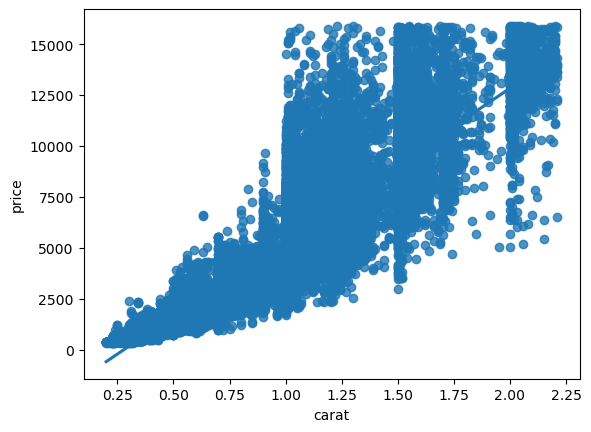

In [39]:
import seaborn as sbn
sbn.regplot(x="carat",y="price",data=focused_vs,fit_reg=True)

C:\Users\Ipek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ipek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


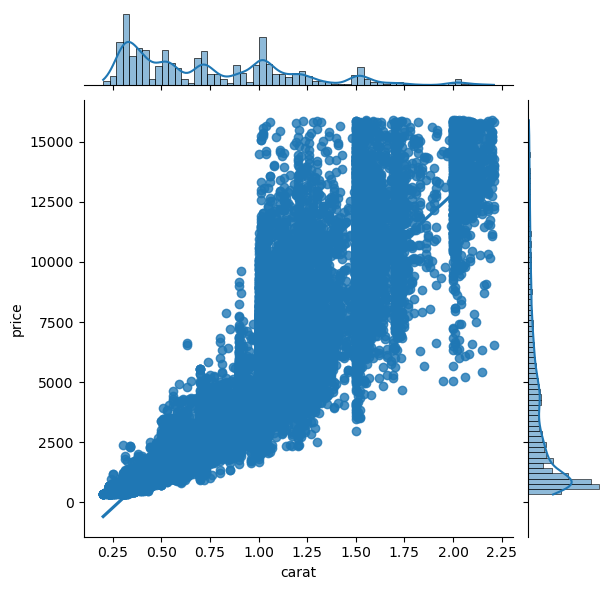

In [40]:
sbn.jointplot(x="carat",y="price",data=focused_vs,kind="reg") #histogramlar ile birlikte çizim

In [41]:
from sklearn.model_selection import train_test_split 
focused_vs_train,focused_vs_test=train_test_split(focused_vs,train_size=0.80,
                                                  test_size=0.20,random_state=2020)

In [42]:
x_train=focused_vs_train["carat"]
y_train=focused_vs_train[["price"]]

x_test=focused_vs_test["carat"]
y_test=focused_vs_test[["price"]]

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(41272,) (10318,) (41272, 1) (10318, 1)


In [43]:
x_Train=x_train.values.reshape(-1,1) 
x_Test=x_test.values.reshape(-1,1)

In [44]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
type(slr)
slr_model=slr.fit(x_Train,y_train)

In [45]:
slr_model.intercept_ #sabit katsayı

array([-2077.74481214])

In [46]:
slr_model.coef_ #katsayı

array([[7445.88132851]])

In [47]:
slr_model.score(x_Train,y_train) #x bağımsız değişkeni y bağımlı değişkenini ne kadar açıklıyor? açıklama yüzdesi %85lik Rkare değeri.

0.8523499011379219

In [49]:
slr_model.predict([[7260]]) #modelin yşapkasını vermiş oldu

array([[54055020.70013794]])

In [50]:
slr_model.predict(x_Train)[0:10]
y_hat_Train=slr_model.predict(x_Train)  #eğitim kümesi için y şapkalar
y_hat_Train=pd.DataFrame(slr_model.predict(x_Train))
y_hat_Train=pd.DataFrame(slr_model.predict(x_Train),index=y_train.index)
#eğitim kümesinde tahminleri elde ettik

In [51]:
#eğitim kümesi tahminleri ile aynı dataframede toplayıp artıkları hesaplatalım

residuals_train=pd.concat([y_train,y_hat_Train],axis=1)
residuals_train.columns=["Real Price","Predicted Price"]
residuals_train["Residuals"] = residuals_train["Real Price"]-residuals_train["Predicted Price"]
residuals_train.head()

,Real Price,Predicted Price,Residuals
18625,7600,6559.477529,1040.522471
12380,598,156.019586,441.980414
14449,5832,7676.359728,-1844.359728
33485,828,304.937213,523.062787
32342,789,156.019586,632.980414


In [56]:
residuals_train["Residuals"] = residuals_train["Real Price"]-residuals_train["Predicted Price"]
residuals_train["SQR Residuals"] = residuals_train["Residuals"]**2
residuals_train["Pr Residuals"] = residuals_train["Residuals"]/residuals_train["Real Price"]
#pr residuals mutlak değer içinde olmalı
residuals_train["Pr Residuals"] = abs(residuals_train["Residuals"]/residuals_train["Real Price"])
np.mean(residuals_train["SQR Residuals"])
RMSE_train=np.mean(residuals_train["SQR Residuals"])**0.5
MAPE_train=np.mean(residuals_train["Pr Residuals"]) 

np.median(residuals_train["Pr Residuals"])
print(RMSE_train,MAPE_train)

1319.6466042987702 0.3467125966037646


In [58]:
#aynı işlemler test set için de yapılırsa:
y_hat_Test=slr_model.predict(x_Test)  #test kümesi için y şapkalar
y_hat_Test=pd.DataFrame(slr_model.predict(x_Test))
y_hat_Test=pd.DataFrame(slr_model.predict(x_Test),index=y_test.index)
    
residuals_test=pd.concat([y_test,y_hat_Test],axis=1)
residuals_test.columns=["Real Price","Predicted Price"]
residuals_test["Residuals"] = residuals_test["Real Price"]-residuals_test["Predicted Price"]
residuals_test.head()

residuals_test["Residuals"] = residuals_test["Real Price"]-residuals_test["Predicted Price"]


residuals_test["SQR Residuals"] = residuals_test["Residuals"]**2 #rmseye giden yol
residuals_test["Pr Residuals"] = residuals_test["Residuals"]/residuals_test["Real Price"] #mapeye giden yol 
#pr residuals mutlak değer içinde olmalı
residuals_test["Pr Residuals"] = abs(residuals_test["Residuals"]/residuals_test["Real Price"])
np.mean(residuals_test["SQR Residuals"])
RMSE_test=np.mean(residuals_test["SQR Residuals"])**0.5
MAPE_test=np.mean(residuals_test["Pr Residuals"]) 
print(RMSE_test,MAPE_test)

1357.8769003690643 0.34878590403363763


### 8-YAPAY SİNİR AĞLARI 

In [61]:
from sklearn.neural_network import MLPRegressor


mlp_regressor = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=2020)
mlp_regressor.fit(X_train, y_train)

C:\Users\Ipek\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=2020)

In [62]:
y_pred_train_nn = mlp_regressor.predict(X_train)
y_pred_test_nn = mlp_regressor.predict(X_test)


RMSE_NN_train = np.sqrt(mean_squared_error(y_train, y_pred_train_nn))
RMSE_NN_test = np.sqrt(mean_squared_error(y_test, y_pred_test_nn))


MAE_NN_train = mean_absolute_error(y_train, y_pred_train_nn)
MAE_NN_test = mean_absolute_error(y_test, y_pred_test_nn)


R2_NN_train = r2_score(y_train, y_pred_train_nn)
R2_NN_test = r2_score(y_test, y_pred_test_nn)


print("RMSE (Train):", RMSE_NN_train)
print("RMSE (Test):", RMSE_NN_test)
print("MAE (Train):", MAE_NN_train)
print("MAE (Test):", MAE_NN_test)
print("R2 Score (Train):", R2_NN_train)
print("R2 Score (Test):", R2_NN_test)

RMSE (Train): 94.71890363811143
RMSE (Test): 136.84953609792552
MAE (Train): 74.42318232853029
MAE (Test): 108.18721025311447
R2 Score (Train): 0.9863110788121661
R2 Score (Test): 0.9696908498314049


### SONUÇ

In [72]:
import pandas as pd

# Her modelin metriklerini bir sözlük içinde 
data = {
    'Support Vector Regression': {
        'Train R2': 0.940134,
        'Train MAPE': 0.089261,
        'Train RMSE': 198.080304,
        'Test R2': 0.938352,
        'Test MAPE': 0.098511,
        'Test RMSE': 195.171788
    },
    'Decision Tree Regression ': {
        'Train R2': 0.9999988037775167,
        'Train MAPE': 8.850250626566416e-06,
        'Train RMSE': 0.8854377448471462,
        'Test R2': 0.9615837685056887,
        'Test MAPE': 0.04135994787327199,
        'Test RMSE': 154.06849126281466
    },
    'KNN Regression' : {
        'Train R2': 0.9811242591721352,
        'Train MAPE': 0.03691487667915865,
        'Train RMSE': 111.22541984636426,
        'Test R2': 0.970746925906881,
        'Test MAPE': 0.04643608899427687,
        'Test RMSE': 134.44424152785422
    },
    'Gradient Boosting Regression' : {
        'Train R2': 0.9833606388209714,
        'Train MAPE': 3.360351912111334,
        'Train RMSE': 104.42882111376431,
        'Test R2': 0.9774472597924058,
        'Test MAPE': 3.9895775080994436,
        'Test RMSE': 118.04731362729385
    },
    'XGB Regression' : {
        'Train R2':0.9987544161475957,
        'Train MAPE': 0.8196256130360929,
        'Train RMSE': 28.57186146188445,
        'Test R2': 0.9763161340105155,
        'Test MAPE': 3.7313610264997568,
        'Test RMSE': 120.97141130441744
    },
    'Random Forest Regression' : {
        'Train R2':0.9924511030811356,
        'Train MAPE':0.021431045741318322,
        'Train RMSE':70.33861271110122,
        'Test R2':0.9779242976333261,
        'Test MAPE':0.038121657695233124  ,
        'Test RMSE':116.79216654756263  
    },
    'Yapay Sinir Ağları' : {
        'Train R2':0.9863110788121661,
        'Train RMSE':94.71890363811143,
        'Test R2':0.9696908498314049,
        'Test RMSE': 136.84953609792552
    }
}

        
        
df = pd.DataFrame(data)
print(df)    
        

            Support Vector Regression  Decision Tree Regression   \
Train R2                     0.940134                   0.999999   
Train MAPE                   0.089261                   0.000009   
Train RMSE                 198.080304                   0.885438   
Test R2                      0.938352                   0.961584   
Test MAPE                    0.098511                   0.041360   
Test RMSE                  195.171788                 154.068491   

            KNN Regression  Gradient Boosting Regression  XGB Regression  \
Train R2          0.981124                      0.983361        0.998754   
Train MAPE        0.036915                      3.360352        0.819626   
Train RMSE      111.225420                    104.428821       28.571861   
Test R2           0.970747                      0.977447        0.976316   
Test MAPE         0.046436                      3.989578        3.731361   
Test RMSE       134.444242                    118.047314      120.9

Özetle; 
diamonds veri seti üzerinde farklı regresyon modelleri kurduk.Bu regresyon modelleri: 

1- Support Vector Regression (SVR):
Veri noktalarını bir hiperdüzlemle en iyi şekilde ayırmaya çalışır.
Regresyon için destek vektör makinelerinin prensiplerini kullanr.
Kernel yöntemiyle (doğrusal olmayan ilişkileri yakalama) esneklik sağlar.
2-Decision Tree Regression:
Karar ağaçları, veri setini bir dizi karar kuralına göre böler.
Her düğüm, bir özelliği ve bu özellik için bir eşik değerini kullanarak verileri böler.
Karmaşıklığı azaltmak için kullanılan önemli bir hiperparametre "max_depth"tir.
3-KNN Regression (K-Nearest Neighbors Regression):
Yeni veri noktalarını, ona en yakın "k" komşusunun ortalamasını kullanarak tahmin yapar.
Regresyon için kullanıldığında, "k" en yakın komşunun ortalamasını tahmin etmek için kullanılır.
4-Gradient Boosting Regression:
Zayıf tahmincileri (genellikle karar ağaçları) bir araya getirerek güçlü bir tahminci oluşturur.
Her bir ağaç, bir önceki ağacın yaptığı hatalara odaklanarak eğitilir ve hataları azaltmaya çalışır.
5-XGB Regression (Extreme Gradient Booing Regression):
Gradient boosting yöntemlerinin optimize edilmiş ve hızlandırılmış bir uygulamasıdır.
Paralel işleme yetenekleri ve daha iyi performans için özel olarak tasarlanmıştır.
6-Random Forest Regression:
Karar ağaçlarının bir koleksiyonnu (ensemble) kullanır.
Rastgele örneklem alma ve özellik seçimiyle oluşturulan ağaçlar arasında varyansı azaltır ve genelleme yeteneğini artırır.
7-Yapay Sinir Ağları (Artifici Neural Networks - ANN):
Beyin yapısını taklit eden hesaplama sistemleridir.
Birbirine bağlı katmanlardan oluşur ve her katmanın nöronları, girdi verilerini işler.
Daha derin ve karmaşık yapılar, derin öğrenme(deep learning)için kullanılır.

Bu regresyon modelleri için CV işlemleri de yapıldı fakat sonuç kısmındaki tablo best parametrelerle çalıştırılmadan önceki r2,MAPE ve RMSE değerlerini içermektedir.

R2 sonucu 1'e ne kadar yakın ise bizim için o kadar iyidir.Fakat eğitim kümesinde R2 değerlerinin modele aşırı uyum sağlaması da modelin bunu çok iyi ezberlediğini ve overfitting sorununu gösterir.
Bu tabloya göre test kümesinde en iyi R2 sonucunu Random Forest Regression modeli vermiştir. 
Düşük MAPE değerleri, modelin daha az yüzde hata ile tahmin yaptığını gösterir. Genellikle, daha küçük MAPE değerleri, modelin daha iyi performans gösterdiğini ve daha doğru tahminler yaptığını gösterir.Burada test kümesinde en küçük MAPE değeri yine Random Forest Regressiondadır.
Daha düşük RMSE değerleri, modelin tahminlerinin gerçek değerlere daha yakın olduğunu ve daha az varyans gösterdiğini ifade eder. Daha küçük RMSE değerleri, daha iyi bir model performansı olarak kabul edilir.Test kümesi en küçük RMSE değeri: Random Forest Regression
Champion: Random Forest Regression :)) 
Ayrıca basit doğrusal regresyon yapıldığında da caratın yüzüğün fiyatını %85 oranında etkilediği görülmüştür.